<a href="https://colab.research.google.com/github/OluwajobaOluwabori/Fall-2022-Data-Science-Challenge-1/blob/main/Fall_2022_Data_Science_Intern_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing neccessary libabries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('/content/2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [3]:
#Calculating Average Order Value
#Average order value (AOV) tracks the average dollar amount spent each time a customer places an order on a website or mobile app. 
#To calculate average order value, simply divide total revenue (order_amount) by the number of orders(total_items).

aov = (df['order_amount'].sum()) / (df['total_items'].sum())
aov

357.92152221412965

In [4]:
#The describe() method computes and displays summary statistics for a Python dataframe.
df.describe()
#The dataframe below also shows three measures of central tendency in statistics- Mean, Median and Mode

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The output above shows where the initial error came from:
3145.13 is the mean/average of the order amount (i.e sum of the values in order amount/count)

{'boxes': [<matplotlib.lines.Line2D at 0x7f28a5ca0e50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f28a5cb6c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f28a5ca0d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f28a5cbdb50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f28a5cb6810>,
  <matplotlib.lines.Line2D at 0x7f28a5cb6f10>]}

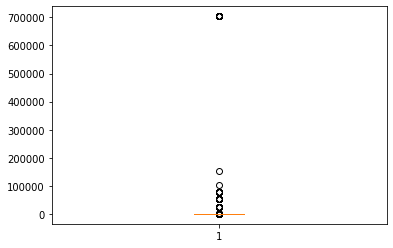

In [5]:
#Identify outliers
plt.boxplot(df['order_amount'])


In [6]:
#Calculate AOV per shop
grouped_df = df.groupby(by=df['shop_id'])['order_amount','total_items'].agg(sum)
grouped_df['aov_per_shop'] = grouped_df['order_amount']/grouped_df['total_items']
grouped_df.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,order_amount,total_items,aov_per_shop
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
6,22627,121,187.0
7,12208,109,112.0
8,11088,84,132.0
9,13806,117,118.0


In [8]:
grouped_df.describe()

,order_amount,total_items,aov_per_shop
count,1.000000e+02,100.000000,100.000000
mean,1.572564e+05,439.360000,407.990000
std,1.216218e+06,3396.366111,2557.462906
min,6.840000e+03,67.000000,90.000000
25%,1.293050e+04,88.000000,132.750000
50%,1.488750e+04,100.000000,153.000000
75%,1.760000e+04,111.250000,168.250000
max,1.199018e+07,34063.000000,25725.000000


In [24]:
n = len(grouped_df[grouped_df['aov_per_shop']== 153.0])

In [33]:
#Calculate the mode
mode = grouped_df['aov_per_shop'].mode().values[0]
print(f"The most occuring AOV is {mode}, number of occurence: {n}")

The most occuring AOV is 153.0, number of occurence: 5
